# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [ ]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [ ]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [ ]:
# TODO
titanic.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [ ]:
# TODO

titanic["Age"].fillna(titanic["Age"].mean(), inplace = True)
titanic["Cabin"].fillna("other", inplace = True)
a= titanic["Embarked"].mode()
titanic["Embarked"].fillna(a[0], inplace = True)
titanic.isna().sum()







PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [ ]:
# TODO

ranked_titanic = titanic
ranked_titanic["Rank"] = ranked_titanic["Fare"].rank(method ='dense', ascending = False)
index = ranked_titanic["Rank"] == 16
ranked_titanic.loc[index,["Name"]]




,Name
390,"Carter, Mr. William Ernest"
435,"Carter, Miss. Lucile Polk"
763,"Carter, Mrs. William Ernest (Lucile Polk)"
802,"Carter, Master. William Thornton II"


### **Question 4: Out of all the females who survived, what's the name who has the 6th most expensive ticket?**

In [ ]:
# TODO

f_titanic = titanic.loc[(titanic["Sex"]=="female") & (titanic["Survived"]==1), :]
f_titanic["Rank"] = f_titanic["Fare"].rank(method = "dense", ascending = False)
indexf = f_titanic["Rank"] == 6
f_titanic.loc[indexf,["Name"]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Name
689,"Madill, Miss. Georgette Alexandra"
730,"Allen, Miss. Elisabeth Walton"
779,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc..."


### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [ ]:
# TODO
survival_rate = pd.pivot_table(titanic, values="Survived", index= ["Sex"], columns=["Pclass"])
print(survival_rate)



Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


Women in general seem to have a higher chance of survival than men. 1st class passengers are more likely to survive than 2nd class passengers who are in turn more likely to survive than the 3rd class. 
1st Class women are the most likely to survive and 3rd class men the least likely as per the above table.



# **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

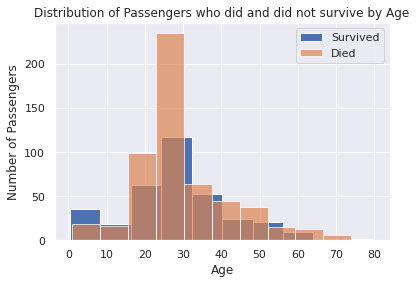

In [ ]:
# TODO

plt.hist(titanic.loc[titanic["Survived"]==1,"Age"])
plt.hist(titanic.loc[titanic["Survived"]==0,"Age"], alpha = 0.7)
plt.ylabel("Number of Passengers")
plt.xlabel("Age")
plt.legend(['Survived', 'Died'])
plt.title("Distribution of Passengers who did and did not survive by Age")
plt.show()

Age seems to have very little effect on the chances of survival. Howvever some of our observations from the above histograms are that young children between the ages of 0 and 10 are more likely to survive. Passengers in their late 20s to early 30s are more likely to die.

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

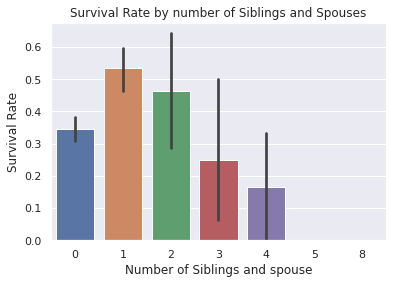

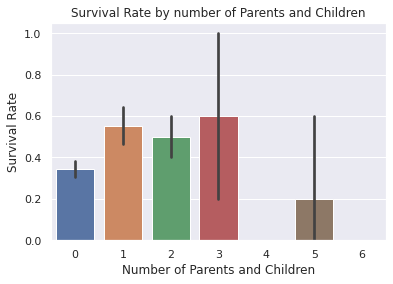

In [ ]:
# TODO

sns.barplot(x="SibSp", y="Survived", data = titanic)
plt.xlabel("Number of Siblings and spouse")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by number of Siblings and Spouses")
plt.show()
sns.barplot(x="Parch", y="Survived", data = titanic)
plt.xlabel("Number of Parents and Children")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by number of Parents and Children")
plt.show()

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

Text(0.5, 1.0, 'Correlation heatmap')

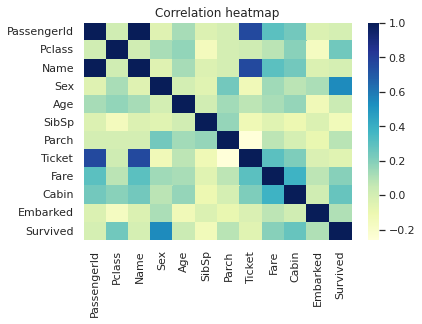

In [ ]:
# TODO

c_titanic= titanic[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']].apply(lambda x: pd.factorize(x)[0]).corr()
       
sns.heatmap(c_titanic, cmap="YlGnBu")
plt.title("Correlation heatmap")

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

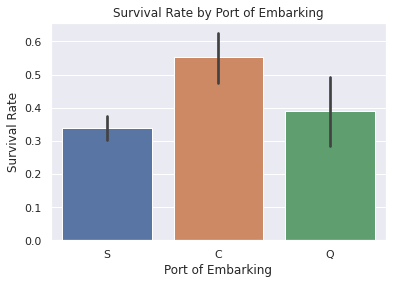

In [ ]:
# TODO

sns.barplot(x="Embarked", y="Survived", data = titanic)
plt.ylabel("Survival Rate")
plt.xlabel("Port of Embarking")
plt.title("Survival Rate by Port of Embarking")
plt.show()




Looking at the port where passengers embarked, Cherbourg has a higher survival rate.